## Observations and Insights 

Observatrions and Insights :
1) Capomulin and Ramicane has better effect in reducing the tumorsize over time than the other two drugs
2) There is linear coefficient for mice weight and average tumor volume for those mice that were on Capomulin
3) Capomlin has the smallest IQR

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_set = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data_set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = data_set["Mouse ID"].nunique()
print(number_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mice_group = data_set.loc[data_set.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_id = Mice_group["Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mice_group


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_set[data_set["Mouse ID"].isin(duplicate_id)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_data["Mouse ID"].nunique()
unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Regimen_group = clean_data.groupby(["Drug Regimen"])
mean = Regimen_group["Tumor Volume (mm3)"].mean()
median = Regimen_group["Tumor Volume (mm3)"].median()
variance = Regimen_group["Tumor Volume (mm3)"].var()
std = Regimen_group["Tumor Volume (mm3)"].std()
SEM = Regimen_group["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"STD":std,"SEM":SEM})
summary_stats




,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

Regimen_group = clean_data.groupby(["Drug Regimen"])
Regimen_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

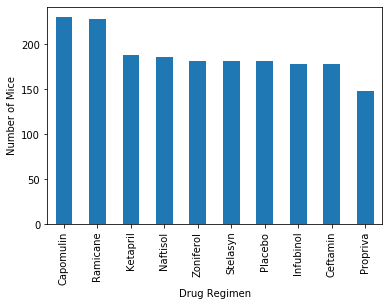

<Figure size 432x288 with 0 Axes>

In [9]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_df = clean_data["Drug Regimen"].value_counts()
bar_df

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

treatment_bar = bar_df.plot(kind="bar")


plt.show()
plt.tight_layout()



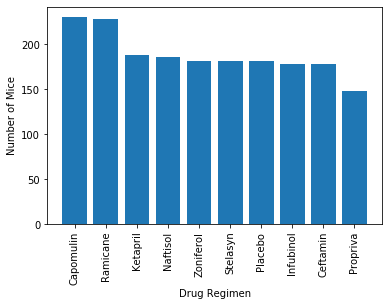

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_df = clean_data["Drug Regimen"].value_counts()
bar_df

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)

plt.bar(bar_df.index,bar_df)

plt.show()
plt.tight_layout()



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



<function matplotlib.pyplot.show(*args, **kw)>

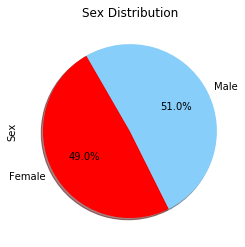

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_groupby = clean_data.groupby("Sex")
sex_count = sex_groupby["Sex"].count()
labels= "Female","Male"
colors = ["red","lightskyblue"]

plt.title("Sex Distribution")
sex_pie = sex_count.plot(kind="pie", labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis=("equal")
plt.show



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint = clean_data.groupby(["Mouse ID"])["Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"].last()
last_timepoint

C:\Users\shong3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
Mouse ID,,,,
a203,Infubinol,45,67.973419,23
a251,Infubinol,45,65.525743,25
a262,Placebo,45,70.717621,29
a275,Ceftamin,45,62.999356,28
a366,Stelasyn,30,63.440686,29
...,...,...,...,...
z435,Propriva,10,48.710661,26
z578,Ramicane,45,30.638696,16
z581,Infubinol,45,62.754451,25


In [14]:
# # Put treatments into a list for for loop (and later for plot labels)
for_loop_list = []
regimen_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
for drug in regimen_list:
    for_loop_list.append(last_timepoint[last_timepoint["Drug Regimen"].isin([drug])]["Tumor Volume (mm3)"])
for_loop_list                      
                           
   
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

Capomulin = last_timepoint[last_timepoint["Drug Regimen"].isin(["Capomulin"])]
Ramincane = last_timepoint[last_timepoint["Drug Regimen"].isin(["Ramicane"])]
Infubionol = last_timepoint[last_timepoint["Drug Regimen"].isin(["Infubinol"])]
Ceftamin = last_timepoint[last_timepoint["Drug Regimen"].isin(["Ceftamin"])]

Capomulin_quartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles [0.25]
Capomulin_upperq = Capomulin_quartiles [0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

Ramincane_quartiles = Ramincane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramincane_lowerq = Ramincane_quartiles[0.25]
Ramincane_upperq = Ramincane_quartiles[0.75]
Ramincane_iqr = Ramincane_upperq-Ramincane_lowerq

Infubionol_quartiles = Infubionol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubionol_lowerq = Infubionol_quartiles[0.25]
Infubionol_upperq = Infubionol_quartiles[0.75]
Infubionol_iqr = Infubionol_upperq- Infubionol_lowerq

Ceftamin_quartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq- Ceftamin_lowerq

print(f"Capomulin_iqr: {Capomulin_iqr}")
print(f"Ramincane_iqr: {Ramincane_iqr}")
print(f"Infubionol_iqr: {Infubionol_iqr}")
print(f"Ceftamin_iqr: {Ceftamin_iqr}")

# add subset 
        
# # Determine outliers using upper and lower bounds
# # Capomulin_lower_bound = Capomulin[lowerq - (1.5*iqr)]
# # upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")    



Capomulin_iqr: 7.781863460000004
Ramincane_iqr: 9.098536719999998
Infubionol_iqr: 11.477135160000003
Ceftamin_iqr: 15.577752179999997


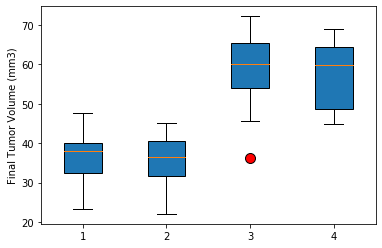

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
box_p = ax1.boxplot(for_loop_list, patch_artist=True)
for flier in box_p['fliers']:
    flier.set(marker='o',markerfacecolor='r', markersize=10)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


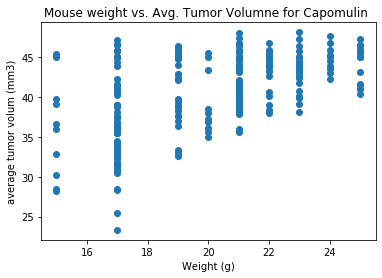

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]
plt.scatter(capo.iloc[:,4],capo.iloc[:,6])

plt.title("Mouse weight vs. Avg. Tumor Volumne for Capomulin ")
plt.xlabel("Weight (g)")
plt.ylabel("average tumor volum (mm3)")

plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
